### 'Prueba de oficio' and Curiosity

The concept of "prueba de oficio" translates to evidence requested or ordered by the court on its own initiative. This means that the court or tribunal has the authority to request or order the production of evidence without a specific request from the parties involved in the case.

This is a mechanism that allows the court to actively participate in the fact-finding process, rather than relying solely on the evidence presented by the parties. It can be particularly useful in complex cases where the court believes that additional evidence is necessary to reach a fair and just decision.

The Peruvian Procedural Code regulates "prueba de oficio" in the article 194, which its text is the following:

"Article 194.- Evidence by the Court
Exceptionally, when the evidence provided by the parties is insufficient to form conviction, the Judge of First or Second Instance will order the performance of additional and relevant evidence that he considers necessary to form conviction and resolve the controversy, as long as the source of evidence has been cited by the parties in the process. With this evidentiary action, the Judge will take care not to replace the parties in their burden of proof, and must ensure their right to contradict the evidence.

The resolution that orders the evidence by the court must be duly motivated, under penalty of nullity, this resolution being unappealable, as long as it adheres to the limits established in this article."

We could find how many times a judge requested more information in a case file. 

Finally it must take into account other procedures, such labor ones, could apply its own procedural law, as well as the Procedural Civil Code, that's why, I recommend work with civil matters.

In [3]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

## Getting ready the data

In [16]:
# Reading the datasets that are useful for this task. They are from the dataset A

follow_up_df = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_follow_up_cleaner_2018.csv", error_bad_lines=False)
df_downloads = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_DOWNLOADS_2018.csv", low_memory=False)
df_file = pd.read_csv(r'C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_file_report_2018.csv')


C:\Users\PC\AppData\Local\Temp\ipykernel_7464\2844129620.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  follow_up_df = pd.read_csv(r"C:\Users\PC\Daniel Chen Dropbox\Alexis Malca\Peru_Justice\02_Data\08_CEJ_Web\data_cleaned\DF_follow_up_cleaner_2018.csv", error_bad_lines=False)
Skipping line 147793: expected 10 fields, saw 18

Skipping line 403502: expected 10 fields, saw 14
Skipping line 403503: expected 10 fields, saw 13
Skipping line 406865: expected 10 fields, saw 19
Skipping line 411463: expected 10 fields, saw 19
Skipping line 417503: expected 10 fields, saw 21
Skipping line 424997: expected 10 fields, saw 16
Skipping line 426098: expected 10 fields, saw 11
Skipping line 426296: expected 10 fields, saw 12
Skipping line 432261: expected 10 fields, saw 13
Skipping line 433084: expected 10 fields, saw 12
Skipping line 436799: expected 10 fields, saw 16

Skipping line 556892: expected 1

In [17]:
# Merge the dataframes on the 'link' column. I use the link column because it works like an ID. 
merged_df = pd.merge(follow_up_df, df_downloads, on='link', how='inner')
merged_df.drop_duplicates(subset=['link'], keep='first', inplace=True)
def clean_text(x):
    if isinstance(x, str):
        return x.replace('\n', ' ').replace('\x0c', '')
    else:
        return ''

merged_df['text'] = merged_df['text'].apply(clean_text)
merged_df['text'] = merged_df['text'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))

In [22]:
# To get the data about the case files, the df_files_report will be useful 

final_df = pd.merge(merged_df, df_file, on='Expediente N°:', how='left')
final_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:_x,Descripción de Usuario:,...,Proceso:,Observación:,Especialidad:,Materia(s):,Estado:,Etapa Procesal:,Fecha Conclusión:,Ubicación:,Motivo Conclusión:,Sumilla:_y
0,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=LRyCGgwXtSvPzXJHvVHJ,22/02/2021,CATORCE,Pta. Cedula Not.,DECRETO,1.0,22/02/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tTÉNGASE POR ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------,SENTENCIA: INFUNDADA
1,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=QDZWktRZbXuTmWDTKBCO,20/01/2021,OFICIO,NaN,OFICIO,1.0,20/01/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOFICIO DEVOL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------,SENTENCIA: INFUNDADA
2,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=FwXRolLumnCYTIEsbom,13/11/2020,OCHO,Pta. Cedula Not.,DECRETO,1.0,13/11/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tESTANDO A LA...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------,SENTENCIA: INFUNDADA
3,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=UhGaVIlKXobSwTzhrK,10/03/2020,INFORME ORAL,NaN,INFORME ORAL,1.0,10/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINFORME ORAL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------,SENTENCIA: INFUNDADA
4,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=vsMguvWXdydPalfVfm,30/10/2019,NUEVE,Pta. Cedula Not.,DECRETO,1.0,07/11/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSEÑÁLESE FEC...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------,SENTENCIA: INFUNDADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923806,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=vqyztkCijSEniYVaReF,17/10/2018,TRES,Pta. Cedula Not.,AUTO,8.0,29/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------,INTERPONEMOS RECURSO DE QUEJA
923807,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------,INTERPONEMOS RECURSO DE QUEJA
923808,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------,INTERPONEMOS RECURSO DE QUEJA
923809,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------,INTERPONEMOS RECURSO DE QUEJA


In [24]:
column_names = final_df.columns.tolist()
print(column_names)


['Expediente N°:', 'link', 'Fecha de Resolución/Ingreso:', 'Resolución:', 'Tipo de Notificación:', 'Acto:', 'Fojas/Folios:', 'Proveido:', 'Sumilla:_x', 'Descripción de Usuario:', 'expediente_num', 'num', 'text', 'error', 'file_path', 'Órgano Jurisdiccional:', 'Distrito Judicial:', 'Juez:', 'Especialista Legal:', 'Fecha de Inicio:', 'Proceso:', 'Observación:', 'Especialidad:', 'Materia(s):', 'Estado:', 'Etapa Procesal:', 'Fecha Conclusión:', 'Ubicación:', 'Motivo Conclusión:', 'Sumilla:_y']


In [25]:
# Specify the columns to delete
columns_to_delete = ['expediente_num', 'Sumilla:_y']

# Delete the columns from the DataFrame
final_df = final_df.drop(columns=columns_to_delete)


In [32]:
final_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:_x,Descripción de Usuario:,...,Fecha de Inicio:,Proceso:,Observación:,Especialidad:,Materia(s):,Estado:,Etapa Procesal:,Fecha Conclusión:,Ubicación:,Motivo Conclusión:
0,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=LRyCGgwXtSvPzXJHvVHJ,22/02/2021,CATORCE,Pta. Cedula Not.,DECRETO,1.0,22/02/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tTÉNGASE POR ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
1,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=QDZWktRZbXuTmWDTKBCO,20/01/2021,OFICIO,NaN,OFICIO,1.0,20/01/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOFICIO DEVOL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
2,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=FwXRolLumnCYTIEsbom,13/11/2020,OCHO,Pta. Cedula Not.,DECRETO,1.0,13/11/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tESTANDO A LA...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
3,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=UhGaVIlKXobSwTzhrK,10/03/2020,INFORME ORAL,NaN,INFORME ORAL,1.0,10/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINFORME ORAL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
4,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=vsMguvWXdydPalfVfm,30/10/2019,NUEVE,Pta. Cedula Not.,DECRETO,1.0,07/11/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSEÑÁLESE FEC...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923806,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=vqyztkCijSEniYVaReF,17/10/2018,TRES,Pta. Cedula Not.,AUTO,8.0,29/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tRESUELVE: ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,20/09/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------
923807,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=plXYcGwKqMvavwzvSpiI,22/11/2018,CINCO,Pta. Cedula Not.,AUTO,1.0,27/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tVISTA LA RAZ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,20/09/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------
923808,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=ksGfhNxGiZvZrYYae,05/11/2018,CUATRO,Pta. Cedula Not.,AUTO,1.0,05/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1°)\tCORREGI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,20/09/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------
923809,00001-2018-1-3301-SP-LA-01,documentoD.html?nid=WSiCFfOXyIaQCLtDTks,03/10/2018,DOS,Pta. Cedula Not.,AUTO,1.0,03/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUTOS VISTOS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,20/09/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,LABORAL,QUEJA DE DERECHO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO GENERAL,-------


In [29]:
# Let's count how many case files we have in the dataset
expediente_counts = final_df['Expediente N°:'].value_counts()
total_unique_files = expediente_counts.shape[0]
print("Total unique case files:", total_unique_files)

Total unique case files: 135933


In [27]:
# Since we will use the Civil Procedural Code, we must work with CIVIL matters for better outcomes

civil_df = final_df.loc[final_df['Especialidad:'].str.contains('CIVIL', case=False)]

# It must be taken into account prueba de oficio measures cannot be in decrees or judgements

civil_df = civil_df.loc[~civil_df['Acto:'].str.contains('DECRETO|SENTENCIA', case=False)]

In [30]:
civil_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:_x,Descripción de Usuario:,...,Fecha de Inicio:,Proceso:,Observación:,Especialidad:,Materia(s):,Estado:,Etapa Procesal:,Fecha Conclusión:,Ubicación:,Motivo Conclusión:
1,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=QDZWktRZbXuTmWDTKBCO,20/01/2021,OFICIO,NaN,OFICIO,1.0,20/01/2021,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOFICIO DEVOL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
3,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=UhGaVIlKXobSwTzhrK,10/03/2020,INFORME ORAL,NaN,INFORME ORAL,1.0,10/03/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tINFORME ORAL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
5,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=MwZSONFSFLZNTSMUNXlS,16/10/2019,OFICIO,NaN,OFICIO,1.0,21/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tOFICIO JUEZ ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
7,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=wPQtqYiDZwvcucvOv,14/06/2018,CONSTANCIA,NaN,ACTA,1.0,14/06/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCONSTANCIA\n...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
8,00001-2018-0-0201-JP-CI-02,documentoD.html?nid=vFzyOwYqODScMvsr,23/12/2020,TRECE,Pta. Cedula Not.,AUTO,2.0,23/12/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE RESUELVE:...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,05/01/2018,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,COBRO DE DINERO,ARCHIVO DEFINITIVO,GENERAL,,ARCHIVO MODULAR,-------
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923797,00006-2018-0-3301-SP-FC-01,documentoD.html?nid=BOMKVzpYbahqvzLDK,14/08/2018,UNO,Pta. Cedula Not.,AUTO,5.0,21/08/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARAR INA...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,08/08/2018,NO CONTENCIOSO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXEQUATUR,ARCHIVO DEFINITIVO,GENERAL,,ESCRIBANIA,-------
923798,00007-2018-0-3301-SP-FC-01,documentoD.html?nid=vDcYuLlSFVVmuHe,02/07/2020,7,Pta. Cedula Not.,AUTO,2.0,08/07/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDECLARAR CO...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,22/10/2018,NO CONTENCIOSO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXEQUATUR,ARCHIVO DEFINITIVO,GENERAL,,POOL ASIST. JUDICIAL,-------
923802,00007-2018-0-3301-SP-FC-01,documentoD.html?nid=QxzYgAjGeeQukAK,29/11/2018,TRES,Pta. Cedula Not.,AUTO,3.0,10/12/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1)\tADMITIR ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,22/10/2018,NO CONTENCIOSO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXEQUATUR,ARCHIVO DEFINITIVO,GENERAL,,POOL ASIST. JUDICIAL,-------
923803,00007-2018-0-3301-SP-FC-01,documentoD.html?nid=wAymdSscmKJoKsWpiX,13/11/2018,DOS,Pta. Cedula Not.,AUTO,2.0,23/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1)\tCONCEDER...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,22/10/2018,NO CONTENCIOSO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXEQUATUR,ARCHIVO DEFINITIVO,GENERAL,,POOL ASIST. JUDICIAL,-------


In [31]:
# Let's count how many civil cases files we have in the dataset
expediente_counts = civil_df['Expediente N°:'].value_counts()
total_unique_files = civil_df.shape[0]
print("Total unique case files:", total_unique_files)


Total unique case files: 377091


### Getting the data of prueba_de_oficio decisions

In [33]:
def prueba_de_oficio(text):
   if pd.isna(text):  # Check if the text is NaN
        return 'No Text'
   
   if any(keyword.lower() in text.lower() for keyword in keywords):
        return 'Prueba_de_Oficio'
   
   else:
        return 'No_Prueba_de_Oficio'

keywords = ['artículo 194', 'prueba de oficio','probatorio de oficio', 'probatorios de oficio']

civil_df['Decision'] = civil_df['text'].apply(prueba_de_oficio)
pdo_df = civil_df[civil_df['Decision'] == 'Prueba_de_Oficio']
pdo_df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:_x,Descripción de Usuario:,...,Proceso:,Observación:,Especialidad:,Materia(s):,Estado:,Etapa Procesal:,Fecha Conclusión:,Ubicación:,Motivo Conclusión:,Decision
1400,00062-2018-0-0201-JP-FC-01,documentoD.html?nid=URLXbugaorFKMjmaJG,14/08/2019,AUDIENCIA UNICA,Pta. Cedula Not.,AUDIENCIA UNICA,3.0,14/08/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCOMUNICANDO ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,AUMENTO DE ALIMENTOS,EN EJECUCION,GENERAL,,ESPECIALISTA,-------,Prueba_de_Oficio
2113,00102-2018-0-0201-JP-FC-01,documentoD.html?nid=gGuFbcoUkiOCmGfB,09/10/2018,AUDIENCIA ÚNICA,NaN,AUDIENCIA UNICA,4.0,09/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUDIENCIA ÚN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,REDUCCION DE ALIMENTOS,SENTENCIADO/ RESUELTO,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2352,00120-2018-0-0201-JP-FC-02,documentoD.html?nid=uityZYWXbZkUVzsbOvLf,17/10/2019,S/N,NaN,AUDIENCIA UNICA,3.0,17/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACTA DE AUDI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,ALIMENTOS,EJECUCION,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2395,00123-2018-0-0201-JP-FC-01,documentoD.html?nid=HMdKFbMrybDKTWQ,30/12/2020,DIECIOCHO,Pta. Cedula Not.,AUTO,1.0,30/12/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tPRESCIDIR DE...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXONERACION DE ALIMENTOS,CON RESOLUCION CONSENTIDA,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2398,00123-2018-0-0201-JP-FC-01,documentoD.html?nid=WauOKwOEXEEELJnmThiI,01/10/2020,ACTA DE AUDIENCIA ÚNICA VIRTUAL,Pta. Cedula Not.,AUDIENCIA UNICA,4.0,01/10/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACTA DE AUDI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXONERACION DE ALIMENTOS,CON RESOLUCION CONSENTIDA,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921220,00152-2018-0-3301-JR-CI-02,documentoD.html?nid=KHQmtTgEAvYvKKBOb,12/12/2018,DIECISIETE,Pta. Cedula Not.,AUTO,3.0,17/12/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tPOR LAS CONS...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,DESALOJO,SENTENCIADO/ RESUELTO,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
921269,00157-2018-0-3301-JR-CI-01,documentoD.html?nid=hLZiQiCEJCSqynLPEoV,23/12/2019,AUDIENCIA DE PRUEBAS,NaN,AUDIENCIA DE PRUEBAS,4.0,23/12/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tEXHIBICION Y...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,ABREVIADO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,MEJOR DERECHO A LA POSESION,SENTENCIADO/ RESUELTO,GENERAL,,POOL ASIST. JUDICIAL,-------,Prueba_de_Oficio
921343,00161-2018-0-3301-JR-CI-01,documentoD.html?nid=lqbxSEHvbPIaSgiADr,12/06/2019,VEINTIDOS,Pta. Cedula Not.,AUTO,2.0,17/06/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t1) LLAMAR AL...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,DESALOJO,EN PLAZO DE IMPUGNACION,GENERAL,,SALA SUPREMA,-------,Prueba_de_Oficio
921348,00161-2018-0-3301-JR-CI-01,documentoD.html?nid=FPWGyAWlixudiROWJv,05/10/2018,ACTA DE AUDIENCIA,NaN,AUDIENCIA,10.0,05/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACTA DE AUDI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,DESALOJO,EN PLAZO DE IMPUGNACION,GENERAL,,SALA SUPREMA,-------,Prueba_de_Oficio


In [38]:
unique_acto = pdo_df['Acto:'].value_counts()
print("Unique observations and their counts in 'Acto:' column:\n", unique_acto)

Unique observations and their counts in 'Acto:' column:
 AUDIENCIA UNICA                                                4125
AUTO                                                           2087
ACTA                                                           1202
AUTO ADMISORIO                                                  146
AUTO FINAL                                                      102
AUDIENCIA DE PRUEBAS                                             91
RESOLUCION                                                       77
AUDIENCIA                                                        66
ACTA DE AUDIENCIA ESPECIAL                                       51
OFICIO                                                           46
AUTO DE VISTA                                                    37
AUDIENCIA DE CONCILIACION                                        32
AUDIENCIA DE ACTUACION Y DECLARACION JUDICIAL                    22
AUDIENCIA DE DECLARACION Y ACTUACION JUDICIAL              

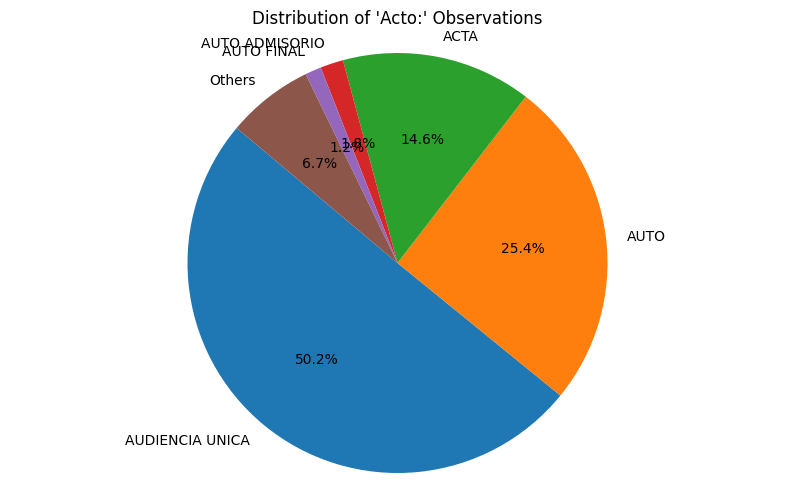

In [43]:
import matplotlib.pyplot as plt

# Get top 5 observations
top_five_acto = pdo_df['Acto:'].value_counts().nlargest(5)

# Get the rest of the observations
others = pd.Series([pdo_df['Acto:'].value_counts().sum() - top_five_acto.sum()], index=['Others'])

# Combine top 5 with others
acto_counts = pd.concat([top_five_acto, others])

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(acto_counts, labels=acto_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of 'Acto:' Observations")
plt.show()

I've read many of the decisions, and the judicial resolution that requires a 'prueba de oficio,' usually occurs during the 'audiencia única.' From a Procedural Law perspective, it makes sense, as in this stage, the Judge defines the points of controversy

In [44]:
audiencia_u__df = pdo_df.loc[pdo_df['Acto:'].str.contains('AUDIENCIA UNICA', case=False)]
audiencia_u__df

,Expediente N°:,link,Fecha de Resolución/Ingreso:,Resolución:,Tipo de Notificación:,Acto:,Fojas/Folios:,Proveido:,Sumilla:_x,Descripción de Usuario:,...,Proceso:,Observación:,Especialidad:,Materia(s):,Estado:,Etapa Procesal:,Fecha Conclusión:,Ubicación:,Motivo Conclusión:,Decision
1400,00062-2018-0-0201-JP-FC-01,documentoD.html?nid=URLXbugaorFKMjmaJG,14/08/2019,AUDIENCIA UNICA,Pta. Cedula Not.,AUDIENCIA UNICA,3.0,14/08/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tCOMUNICANDO ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,AUMENTO DE ALIMENTOS,EN EJECUCION,GENERAL,,ESPECIALISTA,-------,Prueba_de_Oficio
2113,00102-2018-0-0201-JP-FC-01,documentoD.html?nid=gGuFbcoUkiOCmGfB,09/10/2018,AUDIENCIA ÚNICA,NaN,AUDIENCIA UNICA,4.0,09/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUDIENCIA ÚN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,REDUCCION DE ALIMENTOS,SENTENCIADO/ RESUELTO,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2352,00120-2018-0-0201-JP-FC-02,documentoD.html?nid=uityZYWXbZkUVzsbOvLf,17/10/2019,S/N,NaN,AUDIENCIA UNICA,3.0,17/10/2019,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACTA DE AUDI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,ALIMENTOS,EJECUCION,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2398,00123-2018-0-0201-JP-FC-01,documentoD.html?nid=WauOKwOEXEEELJnmThiI,01/10/2020,ACTA DE AUDIENCIA ÚNICA VIRTUAL,Pta. Cedula Not.,AUDIENCIA UNICA,4.0,01/10/2020,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tACTA DE AUDI...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXONERACION DE ALIMENTOS,CON RESOLUCION CONSENTIDA,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
2898,00152-2018-0-0201-JP-FC-01,documentoD.html?nid=YSTtwyWOZtVPvPuHsWNJ,15/11/2018,AUDIENCIA UNICA,Pta. Cedula Not.,AUDIENCIA UNICA,3.0,15/11/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUDIENCIA UN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,EXONERACION DE ALIMENTOS,EN EJECUCION,GENERAL,,ARCHIVO MODULAR,-------,Prueba_de_Oficio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917428,00557-2018-0-3301-JP-FC-02,documentoD.html?nid=oSkYRorbHplgvMHWg,09/10/2018,AUDIENCIA UNICA,Pta. Cedula Not.,AUDIENCIA UNICA,3.0,15/10/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUDIENCIA UN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,ALIMENTOS,EN EJECUCION,GENERAL,,POOL ASIST. JUDICIAL,-------,Prueba_de_Oficio
917683,00580-2018-0-3301-JP-FC-02,documentoD.html?nid=SuuwSpZHyhoiGZtQPbr,14/08/2018,AUDIENCIA UNICA,NaN,AUDIENCIA UNICA,3.0,14/08/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tAUDIENCIA UN...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,UNICO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,FAMILIA CIVIL,ALIMENTOS,EN EJECUCION,GENERAL,,ESPECIALISTA,-------,Prueba_de_Oficio
920047,00091-2018-0-3301-JR-CI-03,documentoD.html?nid=gALxdLENNpPmlfhUmVdB,10/12/2018,AUDIENCIA UNICA,NaN,AUDIENCIA UNICA,4.0,10/12/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSE SANEO ELP...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,DESALOJO,CON EJECUCION CONCLUIDA,GENERAL,,ESPECIALISTA,-------,Prueba_de_Oficio
920871,00130-2018-0-3301-JR-CI-03,documentoD.html?nid=lrDUhKmQbJCCCdR,08/08/2018,AUDIENCIA UNICA,Pta. Cedula Not.,AUDIENCIA UNICA,4.0,08/08/2018,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tSANEADO EL P...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tDESCARGADO P...,...,SUMARISIMO,\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t...,CIVIL,DESALOJO,TRAMITE,GENERAL,,ESPECIALISTA,-------,Prueba_de_Oficio


In [48]:
unique_acto = audiencia_u__df['Juez:'].value_counts()
print("Unique observations and their counts in 'Acto:' column:\n", unique_acto)

Unique observations and their counts in 'Acto:' column:
 NIÑO CASTILLO HILTON RAUL            158
FLORES ESPINOZA ROCIO JANETH         128
URRUTIA MENDEZ JONATHAN PAUL          88
MIGUEL BRAULIO GUTIERREZ SALVADOR     87
GORDILLO GONZALES CARMEN PILAR        85
                                    ... 
VELASQUEZ OYOLA MARIA ROSARIO          1
EDWARD SANTIAGO GARCIA MARIN           1
GARCIA MARIN EDWARD SANTIAGO           1
DELGADO DAVILA JESSICA JULIANNA        1
JOSE LUIS FRANCISCO VENTURA CAVA       1
Name: Juez:, Length: 360, dtype: int64


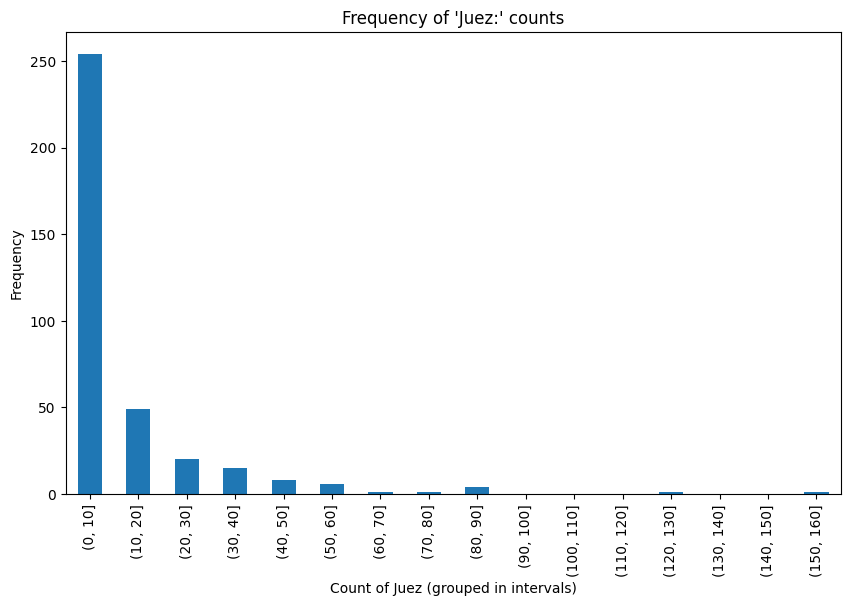

In [51]:
import numpy as np

# Get the value counts
unique_acto = audiencia_u__df['Juez:'].value_counts()

# Define the bins
bins = np.arange(0, unique_acto.max() + 10, 10)

# Group by frequency and bin into intervals
grouped_counts = pd.cut(unique_acto, bins=bins).value_counts()

# Sort by index for better visualization
grouped_counts = grouped_counts.sort_index()

# Plot bar chart
grouped_counts.plot(kind='bar', figsize=(10,6))

plt.title("Frequency of 'Juez:' counts")
plt.xlabel('Count of Juez (grouped in intervals)')
plt.ylabel('Frequency')
plt.show()

In [47]:
one_observation_text = audiencia_u__df['text'].iloc[-5]
one_observation_text

': 00557-2018-0-3301-JP-FC-02 : ALIMENTOS : RODRIGUEZ ROSALES CARLOS : CUBILLAS MURAYARI, OSCAR : DELGADO DONAYRE, FREDY HEYDEN : CASTILLO DE LA CRUZ, JHENNY ESTEFANI 2° JUZGADO DE PAZ LETRADO EXPEDIENTE MATERIA JUEZ ESPECIALISTA DEMANDADO DEMANDANTE AUDIENCIA ÚNICA En Ventanilla, el día nueve de octubre de dos mil dieciocho, siendo las once de la mañana, en el local del Segundo Juzgado de Paz Letrado del Ventanilla, en presencia y bajo la dirección del Señor Juez Carlos Roger Rodríguez Rosales, asistido por el Secretario Oscar Cubillas Murayari; en el proceso seguido por doña JHENNY ESTEFANY CASTILLO DE LA CRUZ contra don FREDY HEYDEN DELGADO DONAYRE sobre alimentos, comparece el demandado identificado con documento nacional de identidad número 48412563, asesorado por la señorita abogada María Victoria Muchaypiña Godoy con carnet del Colegio de Abogados de Lima número 052793, no habiendo comparecido la demandante a pesar de estar bien notificada, conforme se aprecia del cargo de fojas

In [35]:
one_observation_text = pdo_df['text'].iloc[-2]
one_observation_text

' 1° JUZGADO CIVIL - SEDE ANEXO 1 EXPEDIENTE : 00161-2018-0-3301-JR-CI-01 MATERIA JUEZ ESPECIALISTA DEMANDADO DEMANDANTE : DESALOJO : MORENO CCANCCE RICARDO JONNY : PAREDES VILLA, LIDIA VICTORIA : MOSCOSO MUÑOZ, NELLY : VEGA GUANILO, MARIA DEL CARMEN CONTINUACIÓN DE AUDIENCIA la parte demandada: NELLY MOSCOSO MUÑOZ En el Distrito de Ventanilla, cuatro días de octubre año dos mil dieciocho, siendo las once y media de la mañana, al llamado de ley en el local del Primer Juzgado Civil de Ventanilla - Corte Superior de Justicia de Ventanilla, ante el señor Juez Ricardo Jonny Moreno Ccancce, reasumiendo funciones al término de su licencia concedida, asistido por el asistente que da cuenta, se presentaron: De la parte demandante: WALTER EZEQUIEL WONG ALVARADO identificado con DNI N° 09401448 en representación de MARIA DEL CARM EN VEGA GUANILO. De identificada con DNI N°40768144, asistida por su abogada Ángela Linda Pr ado Venturo identificada con CAH N°2068 Recibido el juramento de ley confor